In [1]:
# memanggil library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# memanggil file
df = pd.read_csv('data.csv')
display(df.head())

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


In [13]:
# membuat salinan dataframe dengan kolom atk dan defense
df1 = df[['Attack','Defense']]
display(df1.head())

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [15]:
# melakukan transformasi data
from sklearn.preprocessing import StandardScaler

df1 = StandardScaler().fit_transform(df1)
display(df1)

array([[-8.49267895e-01, -7.20998146e-01],
       [-4.01184435e-01, -2.18256838e-01],
       [ 2.88174735e-01,  4.99945030e-01],
       [ 9.08597987e-01,  1.93634877e+00],
       [-7.45864020e-01, -9.36458706e-01],
       [-3.32248518e-01, -3.97807305e-01],
       [ 3.57110652e-01,  3.20394563e-01],
       [ 1.94263674e+00,  1.50542765e+00],
       [ 1.04646982e+00,  3.20394563e-01],
       [-8.83735853e-01, -1.46436651e-01],
       [-3.66716476e-01,  3.92214750e-01],
       [ 3.22642693e-01,  1.11041662e+00],
       [ 1.01200186e+00,  1.82861849e+00],
       [-1.50415911e+00, -1.22373945e+00],
       [-1.84883869e+00, -5.05537585e-01],
       [-9.87139729e-01, -6.85088053e-01],
       [-1.33181931e+00, -1.40328992e+00],
       [-1.67649890e+00, -6.85088053e-01],
       [ 5.63918403e-01, -1.04418899e+00],
       [ 2.63199591e+00, -1.04418899e+00],
       [-9.87139729e-01, -1.04418899e+00],
       [-4.70120352e-01, -5.05537585e-01],
       [ 2.19238818e-01,  2.12664283e-01],
       [ 2.

elbow method


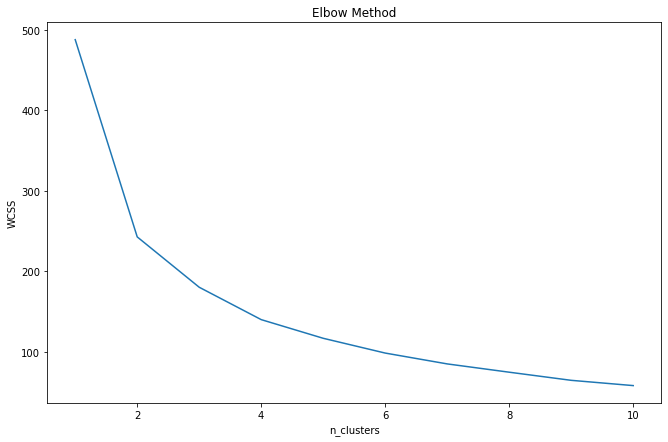

In [17]:
# menggunakan elbow method untuk menentukan jumlah cluster terbaik
print('elbow method')
# menggunakan metode WCSS dan elbow method
# mengatur ukuran figure
from sklearn.cluster import KMeans
figure, ax = plt.subplots(figsize=(11,7))

wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(df1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,11)

# plotting the elbow
plt.plot(number_clusters, wcss)

# memberi judul pada figure, x, dan y axis
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('WCSS')

plt.show()

dari hasil plot elbow di atas, diperoleh n cluster terbaik adalah 3

In [54]:
# mengidentifikasi cluster = 4
kmeans3 = KMeans(n_clusters = 4, random_state = 20)
 
# memberi label objek
label = kmeans3.fit_predict(df1)
 
print(label)

[2 1 1 3 2 1 1 0 0 1 1 3 3 2 2 2 2 2 1 0 2 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1
 1 3 3 2 1 0 2 1 0 2 1 2 2 1 1 2 1 2 1 2 1 1 1 0 2 1 2 2 1 0 2 2 1 1 1 2 1
 1 0 1 0 2 1 0 2 2 2 1 1 0 0 2 1 0 2 1 3 3 3 3 3 3 1 1 0 0 1 1 3 3 0 2 1 1
 1 1 0 2 1 1 1 0 0 3 3 2 2 1 1 3 2 1 0 0 2 1 1 0 0 1 3 3 0 0 1 1 3 3 3 0 2
 3 0 0 2 1 1 1 2 1 2 1 0 2 1 1 0 0 0 2 0 0 1 2 2 1 1 1 0 1 1 3 1 0 0 0 0 3
 0 0 2 1 0 0 0 0 3 1 1 3 2 1 1 1 1 0 2 1 2 2 2 2 2 1 1 2 1 2 2 2 2 1 2 1 2
 2 1 3 3 2 1 3 1 2 2 1 1 2 1 2 2 1 1 3 1 1 1]


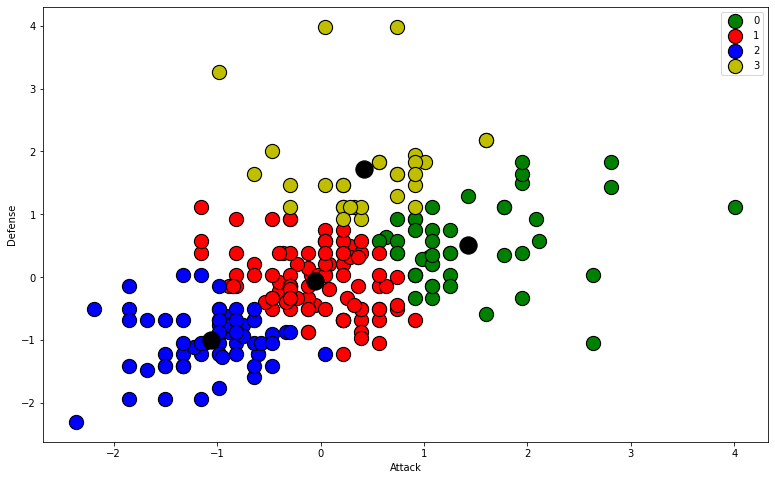

In [55]:
# membuat plot
label0 = df1[label == 0]
label1 = df1[label == 1]
label2 = df1[label == 2]
label3 = df1[label == 3]

# mengatur ukuran figure
figure, ax = plt.subplots(figsize=(13,8))

# plotting the data
sns.scatterplot(x = label0[:,0], y = label0[:,1], 
                    color = 'g', s = 200, label = '0', edgecolor = 'k')
sns.scatterplot(x = label1[:,0], y = label1[:,1], 
                    color = 'r', s = 200, label = '1', edgecolor = 'k')
sns.scatterplot(x = label2[:,0], y = label2[:,1], 
                    color = 'b', s = 200, label = '2', edgecolor = 'k')
sns.scatterplot(x = label3[:,0], y = label3[:,1], 
                    color = 'y', s = 200, label = '3', edgecolor = 'k')

# memberi atribut centroid
centroids3 = kmeans3.cluster_centers_
plt.scatter(centroids3[:,0], centroids3[:,1], s = 300, color = 'k')

# memberi label x dan y axis
plt.xlabel('Attack')
plt.ylabel('Defense')

# memberi atribut legend
plt.legend()

plt.show()

In [56]:
# menghitung nilai silhoutte
from sklearn.metrics import silhouette_score

nilai = silhouette_score(df1, kmeans3.labels_, metric='euclidean')
print('nilai silhoutte scorenya adalah', round(nilai,4))

nilai silhoutte scorenya adalah 0.3619


In [59]:
# mengidentifikasi cluster = 4
model = KMeans(n_clusters = 4, random_state = 20)

#
df2 = df[['Attack','Defense']]

# fitted the model
data_scale = model.fit_transform(df2)
scale_componen = pd.DataFrame(data_scale)
model.fit(scale_componen)

# membuat klaster prediction target
pred = model.predict(scale_componen)

# menggabungkan kolom predict dengan data awal
newframe = pd.DataFrame(df2)
newframe['klaster'] = pred

display(newframe.head())

,Attack,Defense,klaster
0,49,49,3
1,62,63,1
2,82,83,0
3,100,123,0
4,52,43,3


In [60]:
# groupby berdasarkan nilai rata-rata
rata = newframe.groupby(['klaster'],as_index=False).mean()
display(rata)

# menghitung jumlah orang untuk masing-masing klaster
display(newframe.groupby(['klaster'],as_index=False).count().rename(columns={'Attack':'Jumlah Pokemon'}).drop(columns=['Defense']))

,klaster,Attack,Defense
0,0,93.123457,89.777778
1,1,69.678571,62.297619
2,2,127.600000,116.333333
3,3,41.531250,40.703125


,klaster,Jumlah Pokemon
0,0,81
1,1,84
2,2,15
3,3,64


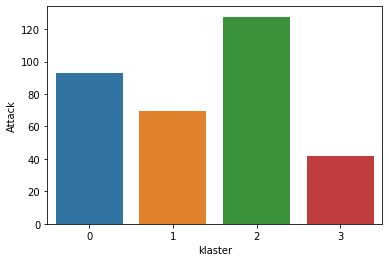

In [62]:
# visualisasi menggunakan barplot untuk kolom Attack
sns.barplot(x = 'klaster', y= 'Attack', data = rata)
plt.show()

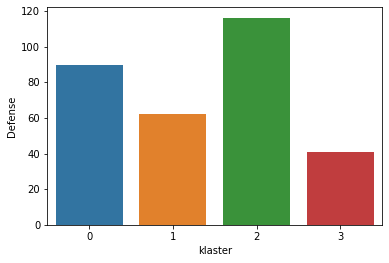

In [64]:
# visualisasi menggunakan barplot untuk kolom Defense
sns.barplot(x = 'klaster', y= 'Defense', data = rata)
plt.show()

#interpretasi

dari hasil analisis cluster menggunakan pendekatan kmeans, diperoleh bahwa jumlah klaster terbaik adalah 4. Adapun hal yang lainnya adalah sebagai berikut :

1. untuk klaster 0, terdapat jumlah pokemon sebanyak 81.

2. untuk klaster 1, terdapat jumlah pokemon sebanyak 84.

3. untuk klaster 2, terdapat jumlah pokemon sebanyak 15.

4. untuk klaster 3, terdapat jumlah pokemon sebanyak 64.

5. jumlah pokemon terbanyak berdasarkan klaster, terdapat pada klaster 1 dan jumlah pokemon yang paling sedikit terdapat pada klaster 2.

6. walaupun klaster 2 memiliki jumlah pokemon yang paling sedikit, tetapi klaster 2 memiliki atribut attack dan defense yang paling tinggi diantara klaster yang lain, yaitu dengan rata-rata attack sebesar 127.6 dan rata-rata defense sebesar 116.3.

7. klaster 3 memiliki rata-rata atribut attack dan defense yang paling rendah dibandingkan dengan klaster yang lain, yaitu dengan rata-rata attack sebesar 41.5 dan rata-rata defense sebesar 40.7.

8. silhoutte scorenya adalah 0.3619, yang berarti pemisahan antar klaster sudah cukup baik. walaupun masih ada beberapa titik yang saling berhimpit antar klaster. dapat dilihat bahwa antar anggota pada klaster 3 dan klaster 0 menyebar cukup jauh.